<a href="https://colab.research.google.com/github/nudojacopo/nudojacopo/blob/main/synthetic_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [1]:
!git clone https://github.com/nudojacopo/thesis.git
from google.colab import drive
drive.mount('/content/drive')
root='/content/'
import sys
module_path = root+'thesis/src/SYN'
sys.path.append(module_path)
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
!pip install powerlaw
from SYN_package.functions import *
from SYN_package.estimate_parameters import *
from scipy import stats
import random
from scipy.stats import chi2
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import powerlaw
import warnings

Cloning into 'thesis'...
remote: Enumerating objects: 1260, done.
remote: Counting objects: 100% (509/509), done.
remote: Compressing objects: 100% (275/275), done.
remote: Total 1260 (delta 353), reused 346 (delta 233), pack-reused 751
Receiving objects: 100% (1260/1260), 62.48 MiB | 9.47 MiB/s, done.
Resolving deltas: 100% (796/796), done.
Mounted at /content/drive


## Prepare Data

In [2]:
rd=pd.read_csv('/content/drive/MyDrive/thesis/data/reddit/reddit_labeled_data_unified_processed.csv')
fb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_snews_processed.csv')
vo=pd.read_csv('/content/drive/MyDrive/thesis/data/voat/voat_processed.csv')
gb=pd.read_csv('/content/drive/MyDrive/thesis/data/gab/gab_processed.csv')
#yt=pd.read_csv('/content/drive/MyDrive/thesis/data/youtube/processed_sample.csv')

fbb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_brexit_all_comments_scored_processed.csv')

fbv=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_vaccines_all_comments_scored_processed.csv')


In [3]:
fb = fb[fb['temporal_distance_birth_h'] < 100].copy()
fb['temporal_distance_birth_base_100h'] = fb['temporal_distance_birth_h'] / 100
fb['IAT_base_100h']=fb['IAT_user_thread']/(60*60*100)

gb = gb[gb['temporal_distance_birth_h'] < 100].copy()
gb['temporal_distance_birth_base_100h'] = gb['temporal_distance_birth_h'] / 100
gb['IAT_base_100h']=gb['IAT_user_thread']/(60*60*100)

fbb = fbb[fbb['temporal_distance_birth_h'] < 100].copy()
fbb['temporal_distance_birth_base_100h'] = fbb['temporal_distance_birth_h'] / 100
fbb['user_id']=fbb['from_id']
fbb['IAT_base_100h']=fbb['IAT_user_thread']/(60*60*100)

fbv = fbv[fbv['temporal_distance_birth_h'] < 100].copy()
fbv['temporal_distance_birth_base_100h'] = fbv['temporal_distance_birth_h'] / 100
fbv['user_id']=fbv['from_id']
fbv['IAT_base_100h']=fbv['IAT_user_thread']/(60*60*100)

rd = rd[rd['temporal_distance_birth_h'] < 100].copy()
rd['IAT_base_100h']=rd['IAT_user_thread']/(60*60*100)
rd['created_at']=rd['date']
rd['comment_id']=rd['comment_code']
rd['temporal_distance_birth_base_100h'] = rd['temporal_distance_birth_h'] / 100

vo = vo[vo['temporal_distance_birth_h'] < 100].copy()
vo['IAT_base_100h']=vo['IAT_user_thread']/(60*60*100)
vo['temporal_distance_birth_base_100h'] = vo['temporal_distance_birth_h'] / 100
vo['post_id'] = vo['root_submission']
vo['user_id']=vo['user']

yt = yt[yt['temporal_distance_birth_h'] < 100].copy()
yt['IAT_base_100h']=yt['IAT_user_thread']/(60*60*100)
yt['temporal_distance_birth_base_100h'] = yt['temporal_distance_birth_h'] / 100
yt['user_id']=yt['user']



NameError: name 'yt' is not defined

## Search parameters

In [ ]:
from SYN_package.estimate_parameters import *
params_dict={}

names = ['gb']
datas = [gb]  # Assuming vo, fb, rd, yt are your actual dataframes

params_dict = process_social_platform(names, datas)
print(params_dict)

100%|██████████| 1/1 [00:24<00:00, 24.18s/it]

{'gb': {'gamma': 3.215282467909702, 'a': 0.4018256269460139, 'b': 104.43829857709679, 'loc': 0.0009999999999999998, 'scale': 13.01795195375287, 'alpha': 0.25, 'lambda': 0.20000000000000004, 'c': 1.1526181678983425, 'd': 0.12186062608219086, 'l': 2.7777777777777775e-06, 's': 1.2435475829755767, 'cf': 0.8447527697340091, 'df': 0.19163933251151466, 'lf': 2.7777777777777775e-06, 'sf': 1.5688864219589722}}


In [4]:
params_dict={'vo': {'gamma': 5.560174158235733,
  'a': 0.7683453768943135,
  'b': 181.35859916908146,
  'loc': 0.0009999999999999998,
  'scale': 10.849357267138616,
  'alpha': 0.35,
  'lambda': 0.5000000000000001,
  'c': 1.3825444184574849,
  'd': 0.3148667223304995,
  'l': -7.559994673910446e-07,
  's': 0.014817594985246601,
  'cf': 5.288800316735881,
  'df': 0.04913571005774435,
  'lf': 2.7777777777777775e-06,
  'sf': 0.24403022567064098},
 'fb': {'gamma': 1.920612852062878,
  'a': 0.3844295492882861,
  'b': 294.47288219865607,
  'loc': 0.0009999999999999998,
  'scale': 33.07578198818712,
  'alpha': 0.1,
  'lambda': 1.0500000000000003,
  'c': 1.4925263821442911,
  'd': 0.08849381153322906,
  'l': 2.7777777777777775e-06,
  's': 1.3440750553651393,
  'cf': 1.1530515610823424,
  'df': 0.1221286925154284,
  'lf': 2.7777777777777775e-06,
  'sf': 1.243471290490271},
 'rd': {'gamma': 2.1172386372477376,
  'a': 1.3208418726992361,
  'b': 366274394.2558266,
  'loc': 0.00043188573340450587,
  'scale': 21377429.04281839,
  'alpha': 0.3,
  'lambda': 0.5000000000000001,
  'c': 1.4035122312087873,
  'd': 0.34547543092801714,
  'l': 2.777777777776469e-06,
  's': 0.009685929534020282,
  'cf': 1.061267002974987,
  'df': 0.16381176822206486,
  'lf': 2.7777777777777775e-06,
  'sf': 1.708837260306469},
 'yt': {'gamma': 1.4925219530385783,
  'a': 0.5186615140672572,
  'b': 1.7898387515641103,
  'loc': 0.0009999999999999998,
  'scale': 1.1104373293304093,
  'alpha': 0.25,
  'lambda': 0.7000000000000002,
  'c': 0.23913021624295291,
  'd': 0.8360268077508817,
  'l': 2.7777777777777775e-06,
  's': 1.1670856167197128,
  'cf': 0.9540739202382167,
  'df': 0.16186901441564588,
  'lf': 2.7777777777777775e-06,
  'sf': 1.6193827108817946},'gb': {'gamma': 3.215282467909702, 'a': 0.4018256269460139, 'b': 104.43829857709679, 'loc': 0.0009999999999999998, 'scale': 13.01795195375287, 'alpha': 0.25, 'lambda': 0.20000000000000004, 'c': 1.1526181678983425, 'd': 0.12186062608219086, 'l': 2.7777777777777775e-06, 's': 1.2435475829755767, 'cf': 0.8447527697340091, 'df': 0.19163933251151466, 'lf': 2.7777777777777775e-06, 'sf': 1.5688864219589722}}

## Simulate synthetic data

In [71]:
def simulate_number_of_comments(alpha, lambda_,size=1):
    # Simula la componente inflazionata (produce 0 con probabilità alpha)
    inflate = np.random.binomial(1, alpha, size)
    # Simula la componente contatore (distribuzione esponenziale negativa)
    counts = np.random.exponential(1/lambda_, size)
    # Discretizza i valori esponenziali per ottenere valori di conteggio interi
    counts = np.round(counts).astype(int)
    counts[counts<0]=0
    # Combina le componenti inflazionate e di conteggio
    simulated_data = inflate * (counts)
    return simulated_data



import random

def simulate_data_M2(social,gamma, a, b,loc,scale, alpha, lambda_,c,d,l,s,cf, df, lf, sf, num_threads=False, activate_tqdm=True,min_users=50):
    data = []
    if num_threads!=False:
        num_threads = min(num_threads, len(social['post_id'].unique()))
        thread_ids = random.sample(list(social['post_id'].unique()), num_threads)
    else:
        thread_ids = social['post_id'].unique()
    # Use tqdm conditionally
    if activate_tqdm:
        thread_ids = tqdm(thread_ids)

    for th in thread_ids:
        thread = social[social['post_id'] == th]
        number_of_users = int(np.round(simulate_number_of_users(gamma, min_users, size=1)))
        T0s = simulate_inital_comment( a, b,loc,scale, size=number_of_users)
        Ns = (simulate_number_of_comments(alpha, lambda_,number_of_users) )+1
        thread = [[T0s[i]] + [np.nan] * (Ns[i] - 1) for i in range(number_of_users)]
        K=(0.05*sum(Ns)).astype(int)
        thread = positioning_replies(thread,c, d, l, s,K)
        for u,interaction in enumerate(thread):
          timing = np.cumsum(np.array(interaction, dtype=float))
          timing = [x for x in timing if x <= 1]
          for j,t in enumerate(timing):
              data.append({'user_id': f'User_{u}', 'post_id': th, 'temporal_distance_birth_base_100h': t,'sequential_number_of_comment_by_user_in_thread': j+1})

    simulated = pd.DataFrame(data)
    observed = social[social['post_id'].isin(simulated['post_id'].unique())][['user_id', 'post_id', 'temporal_distance_birth_base_100h','sequential_number_of_comment_by_user_in_thread']]

    return simulated, observed


import math
import numpy as np
from scipy.stats import burr

def positioning_replies(data, c, d, l, s, K):
    while True:
        candidates = []
        has_nan = False

        # Trova tutte le liste con nan e l'ultimo valore non-nan
        for sublist in data:
            if math.isnan(sublist[-1]):
                non_nan_values = [x for x in sublist if not math.isnan(x)]
                if non_nan_values:
                    candidates.append((non_nan_values[-1], sublist))
                    has_nan = True

        # Se non ci sono più candidati con nan, esci dal ciclo
        if not has_nan:
            break

        candidates.sort(key=lambda x: x[0])
        most_recent_non_nan = candidates[0][0]
        target_list = candidates[0][1]
        all_values = sorted([x for sublist in data for x in sublist if not math.isnan(x)])
        index = all_values.index(most_recent_non_nan)
        if index + K < len(all_values):
            new_value = all_values[index + K]
        else:
            new_value = all_values[-1]
        for i in range(len(target_list)):
            if math.isnan(target_list[i]):
                iat = burr.rvs(c, d, l, s, size=1)
                if (new_value - sum(target_list[0:i-1])) < iat:
                    target_list[i] = iat[0]
                elif (new_value - sum(target_list[0:i-1])) >1.5* iat:
                    target_list[i] = iat[0]
                else:
                    target_list[i] = new_value
                break
    return data


In [74]:

names = ['vo', 'fb', 'rd', 'gb']
datas = [vo, fb, rd, gb]  # Assuming vo, fb, rd, yt are your actual dataframes
time_intervals = np.arange(0, 1, 0.01)
all_dfs=[]
for i,df in  (enumerate(datas)):#,total=len(datas)):
    social=names[i]
    parameters=params_dict[social]
    # Simulazione dei dati per la piattaforma corrente
    n = 100
    simulated_t, observed_t = simulate_data_M2(df, parameters['gamma'], parameters['a'], parameters['b'], parameters['loc'],
                                            parameters['scale'], parameters['alpha'], parameters['lambda'], parameters['c'],
                                            parameters['d'], parameters['l'], parameters['s'], parameters['cf'],
                                            parameters['df'], parameters['lf'], parameters['sf'], num_threads=n,activate_tqdm=False)
    globals()[social+'s'] = simulated_t
    globals()[social+'o'] = observed_t


    # Calcolo dell'ECDF per i dati simulati e osservati
    simulated_t_ECDF = calculate_ECDF(simulated_t, time_intervals)
    simulated_t_ECDF['Platform'] = social
    simulated_t_ECDF['Style'] = 'Simulated'

    observed_t_ECDF = calculate_ECDF(observed_t, time_intervals)
    observed_t_ECDF['Platform'] = social
    observed_t_ECDF['Style'] = 'Observed'

    # Concatenazione dei dataframe per simulati e osservati per la piattaforma corrente
    df_platform = pd.concat([simulated_t_ECDF, observed_t_ECDF], ignore_index=True)
    all_dfs.append(df_platform)

# Concatenazione di tutti i dataframe delle piattaforme
df_all = pd.concat(all_dfs, ignore_index=True)



<ipython-input-71-e65a03280461>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  number_of_users = int(np.round(simulate_number_of_users(gamma, min_users, size=1)))
Processing DataFrame: 100%|██████████| 100/100 [00:11<00:00,  8.71it/s]
<ipython-input-71-e65a03280461>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  number_of_users = int(np.round(simulate_number_of_users(gamma, min_users, size=1)))
Processing DataFrame: 100%|██████████| 100/100 [00:11<00:00,  8.68it/s]
<ipython-input-71-e65a03280461>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a sin

In [70]:
vos

,user_id,post_id,temporal_distance_birth_base_100h,sequential_number_of_comment_by_user_in_thread
0,User_0,3094084,0.006217,1
1,User_1,3094084,0.042010,1
2,User_1,3094084,0.099262,2
3,User_1,3094084,0.100816,3
4,User_2,3094084,0.007530,1
...,...,...,...,...
54105,User_98,3424570,0.004155,1
54106,User_99,3424570,0.001215,1
54107,User_100,3424570,0.086124,1
54108,User_101,3424570,0.081499,1


## Dynamic

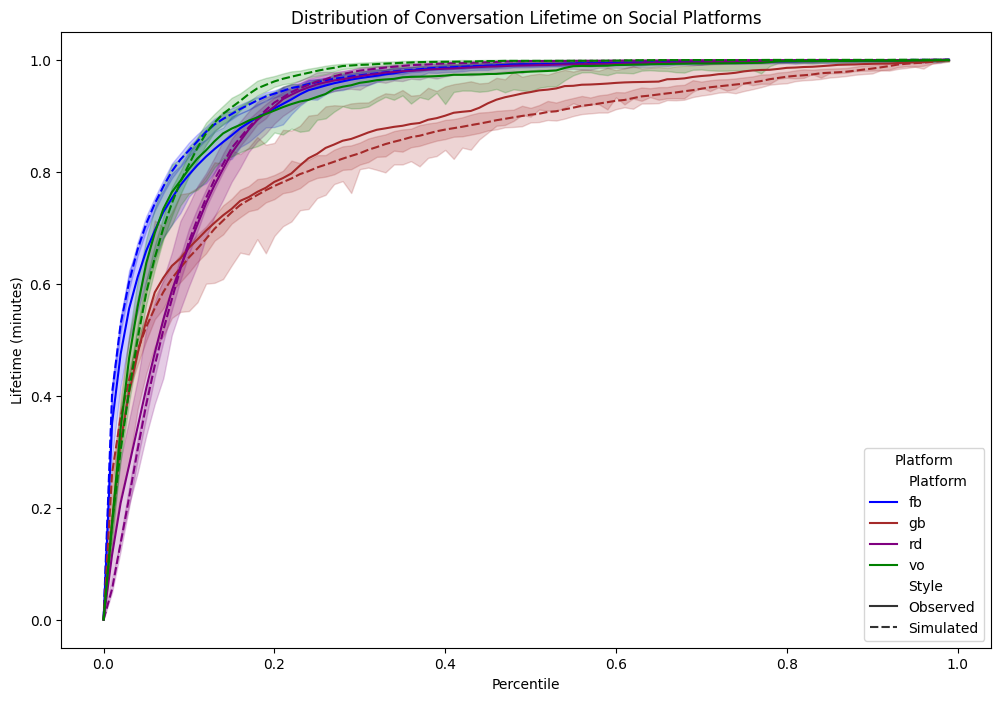

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_all is already defined and contains the necessary data
# Custom palette
palette = {'rd': 'purple', 'vo': 'green', 'fb': 'blue', 'yt': 'red','gb':'brown'}
df_all = df_all.sort_values(by='Style')

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_all, x='Time Grid Value', y='Share', hue='Platform', style='Style', err_style='band', errorbar=('ci', 100), palette=palette)
plt.title('Distribution of Conversation Lifetime on Social Platforms')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()


## Lifetime

<ipython-input-80-799097b0c6ca>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='source', y='temporal_distance_birth_base_100h', data=combined_data, showfliers=False, palette=['purple', 'green', 'red', 'blue'])


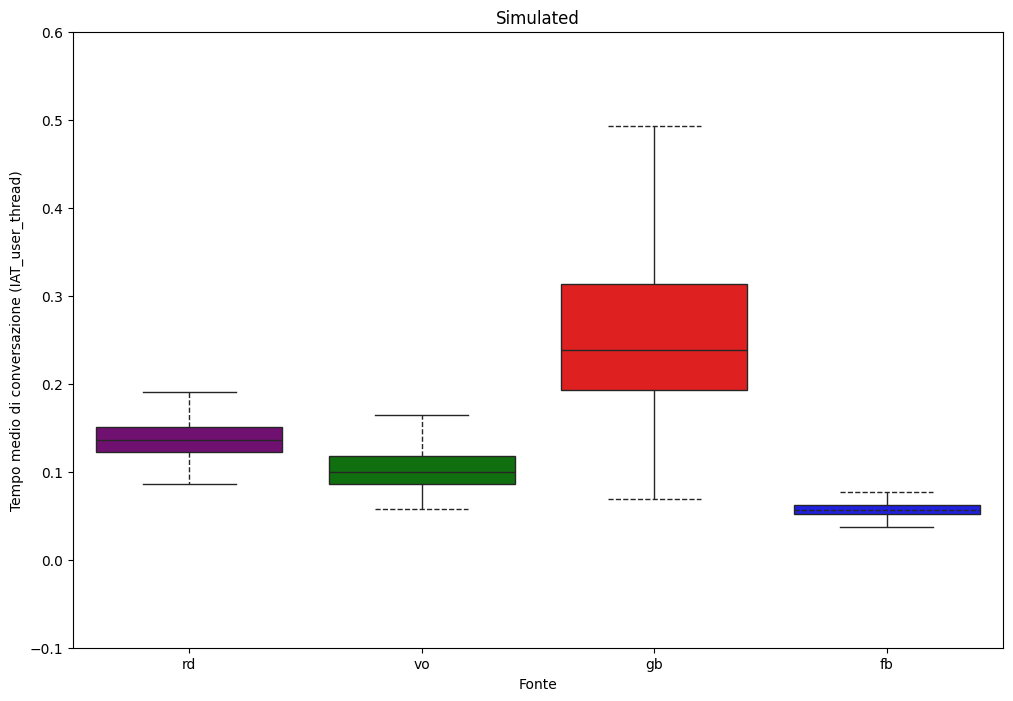

<ipython-input-80-799097b0c6ca>:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='source', y='temporal_distance_birth_base_100h', data=combined_data, showfliers=False, palette=['purple', 'green','red', 'blue'])


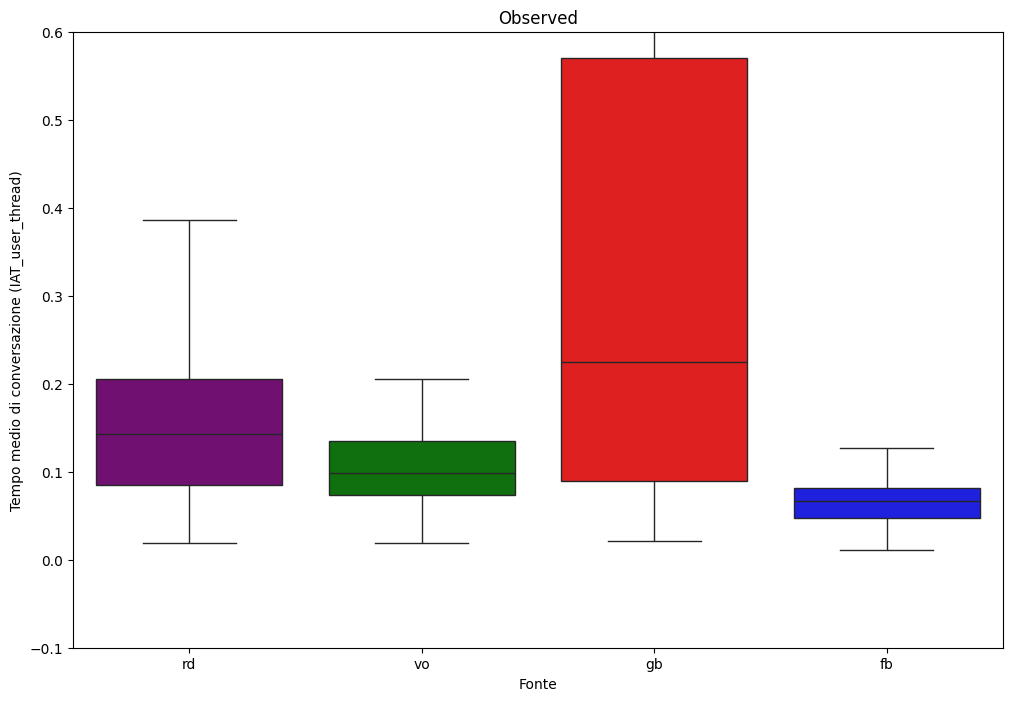

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rds=rds.groupby(['post_id','user_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
fbs=fbs.groupby(['post_id','user_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
vos=vos.groupby(['post_id','user_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
gbs=gbs.groupby(['post_id','user_id'])['temporal_distance_birth_base_100h'].sum().reset_index()


# Calcolare il tempo totale di conversazione per ogni utente e post in rd
time_of_conversation_rd = rds.groupby(['user_id', 'post_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
# Calcolare la media del tempo di conversazione per ogni post in rd
mean_time_of_conversation_rd = time_of_conversation_rd.groupby('post_id')['temporal_distance_birth_base_100h'].mean().reset_index()

# Calcolare il tempo totale di conversazione per ogni utente e post in fb
time_of_conversation_fb = fbs.groupby(['user_id', 'post_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
# Calcolare la media del tempo di conversazione per ogni post in fb
mean_time_of_conversation_fb = time_of_conversation_fb.groupby('post_id')['temporal_distance_birth_base_100h'].mean().reset_index()

# Calcolare il tempo totale di conversazione per ogni utente e post in vo
time_of_conversation_vo = vos.groupby(['user_id', 'post_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
# Calcolare la media del tempo di conversazione per ogni post in vo
mean_time_of_conversation_vo = time_of_conversation_vo.groupby('post_id')['temporal_distance_birth_base_100h'].mean().reset_index()

# Calcolare il tempo totale di conversazione per ogni utente e post in rd
time_of_conversation_yt = gbs.groupby(['user_id', 'post_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
# Calcolare la media del tempo di conversazione per ogni post in rd
mean_time_of_conversation_yt = time_of_conversation_yt.groupby('post_id')['temporal_distance_birth_base_100h'].mean().reset_index()


# Unire i dati per fare il confronto
mean_time_of_conversation_rd['source'] = 'rd'
mean_time_of_conversation_fb['source'] = 'fb'
mean_time_of_conversation_vo['source'] = 'vo'
mean_time_of_conversation_yt['source'] = 'gb'

combined_data = pd.concat([
    mean_time_of_conversation_rd,
        mean_time_of_conversation_vo,
        mean_time_of_conversation_yt,
    mean_time_of_conversation_fb

])

plt.figure(figsize=(12, 8))
sns.boxplot(x='source', y='temporal_distance_birth_base_100h', data=combined_data, showfliers=False, palette=['purple', 'green', 'red', 'blue'])

# Aggiungere le linee tratteggiate
for i in range(len(combined_data['source'].unique())):
    plt.gca().lines[6*i].set_linestyle('--')
    plt.gca().lines[6*i+1].set_linestyle('--')

plt.title('Simulated')
plt.xlabel('Fonte')
plt.ylabel('Tempo medio di conversazione (IAT_user_thread)')
plt.ylim(-0.1, 0.6)
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rdo=rdo.groupby(['post_id','user_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
fbo=fbo.groupby(['post_id','user_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
voo=voo.groupby(['post_id','user_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
gbo=gbo.groupby(['post_id','user_id'])['temporal_distance_birth_base_100h'].sum().reset_index()


# Calcolare il tempo totale di conversazione per ogni utente e post in rd
time_of_conversation_rd = rdo.groupby(['user_id', 'post_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
# Calcolare la media del tempo di conversazione per ogni post in rd
mean_time_of_conversation_rd = time_of_conversation_rd.groupby('post_id')['temporal_distance_birth_base_100h'].mean().reset_index()

# Calcolare il tempo totale di conversazione per ogni utente e post in fb
time_of_conversation_fb = fbo.groupby(['user_id', 'post_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
# Calcolare la media del tempo di conversazione per ogni post in fb
mean_time_of_conversation_fb = time_of_conversation_fb.groupby('post_id')['temporal_distance_birth_base_100h'].mean().reset_index()

# Calcolare il tempo totale di conversazione per ogni utente e post in vo
time_of_conversation_vo = voo.groupby(['user_id', 'post_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
# Calcolare la media del tempo di conversazione per ogni post in vo
mean_time_of_conversation_vo = time_of_conversation_vo.groupby('post_id')['temporal_distance_birth_base_100h'].mean().reset_index()

# Calcolare il tempo totale di conversazione per ogni utente e post in rd
time_of_conversation_yt = gbo.groupby(['user_id', 'post_id'])['temporal_distance_birth_base_100h'].sum().reset_index()
# Calcolare la media del tempo di conversazione per ogni post in rd
mean_time_of_conversation_yt = time_of_conversation_yt.groupby('post_id')['temporal_distance_birth_base_100h'].mean().reset_index()


# Unire i dati per fare il confronto
mean_time_of_conversation_rd['source'] = 'rd'
mean_time_of_conversation_fb['source'] = 'fb'
mean_time_of_conversation_vo['source'] = 'vo'
mean_time_of_conversation_yt['source'] = 'gb'

combined_data = pd.concat([
    mean_time_of_conversation_rd,
        mean_time_of_conversation_vo,
        mean_time_of_conversation_yt,
    mean_time_of_conversation_fb

])

# Creare i boxplot per confrontare le distribuzioni
plt.figure(figsize=(12, 8))
sns.boxplot(x='source', y='temporal_distance_birth_base_100h', data=combined_data, showfliers=False, palette=['purple', 'green','red', 'blue'])
plt.title('Observed')
plt.xlabel('Fonte')
plt.ylabel('Tempo medio di conversazione (IAT_user_thread)')
plt.ylim(-0.1,0.6)
plt.show()


## Conversation

  0%|          | 0/4 [00:00<?, ?it/s]<ipython-input-76-259ddc8d932c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['temporal_distance_birth_base_100h'])
<ipython-input-76-259ddc8d932c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sequential_position'] = df.groupby('post_id')['time'].rank(method='first')
<ipython-input-76-259ddc8d932c>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

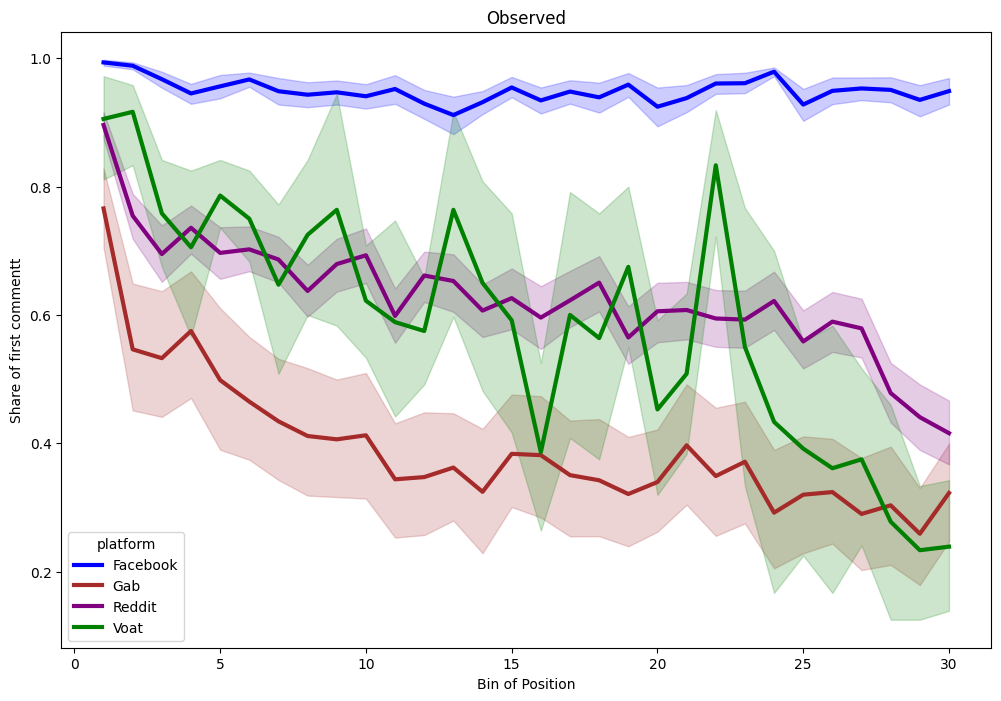

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # tqdm for progress bar

# Assuming rd, fb, vo, yt are your DataFrames

# Add 'platform' column to each DataFrame
rdo['platform'] = 'Reddit'
voo['platform'] = 'Voat'
fbo['platform'] = 'Facebook'
gbo['platform'] = 'Gab'
# Combine all DataFrames into a single DataFrame
all_data = []

# Process each dataset individually
for df in tqdm([rdo,  voo,fbo,gbo]):#yto
    df['number_of_comments'] = df.groupby('post_id')['post_id'].transform('count')
    df=df[df['number_of_comments']>100]
    df['time'] = pd.to_datetime(df['temporal_distance_birth_base_100h'])
    df['sequential_position'] = df.groupby('post_id')['time'].rank(method='first')

    # Determine the number of bins
    num_bins = 30

    # Calculate the bin of position
    df['bin_of_position'] = ((df['sequential_position'] - 1) / df['number_of_comments'] * num_bins).astype(int) + 1

    # Adjust bins to be between 1 and num_bins
    df['bin_of_position'] = df['bin_of_position'].clip(lower=1, upper=num_bins)
    df['first_comment']=df['sequential_number_of_comment_by_user_in_thread']==1
    # Group by 'bin_of_position', 'post_id', and calculate unique users per post
    df['first_comment'] = df.groupby(['bin_of_position', 'post_id'])['first_comment'].transform('mean')
    all_data.append(df)
all_data = pd.concat(all_data, ignore_index=True)
# Aggregate data across all datasets
agg_activity = all_data.groupby(['platform', 'bin_of_position', 'post_id'])['first_comment'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=agg_activity,
    x='bin_of_position',
    y='first_comment',
    hue='platform',  # Different line for each platform
    estimator='mean',  # or 'sum', 'median', etc. depending on your aggregation preference
    errorbar=('ci', 80),  # 99.999% confidence interval
    linewidth=3,
    palette={'Reddit': 'purple', 'Voat': 'green', 'Facebook': 'blue','Gab': 'brown'}#,'YouTube':'red'}  # Custom palette with specified colors
)
plt.title('Observed')
plt.ylabel('Share of first commentt')
plt.xlabel('Bin of Position')
plt.grid(False)
plt.show()


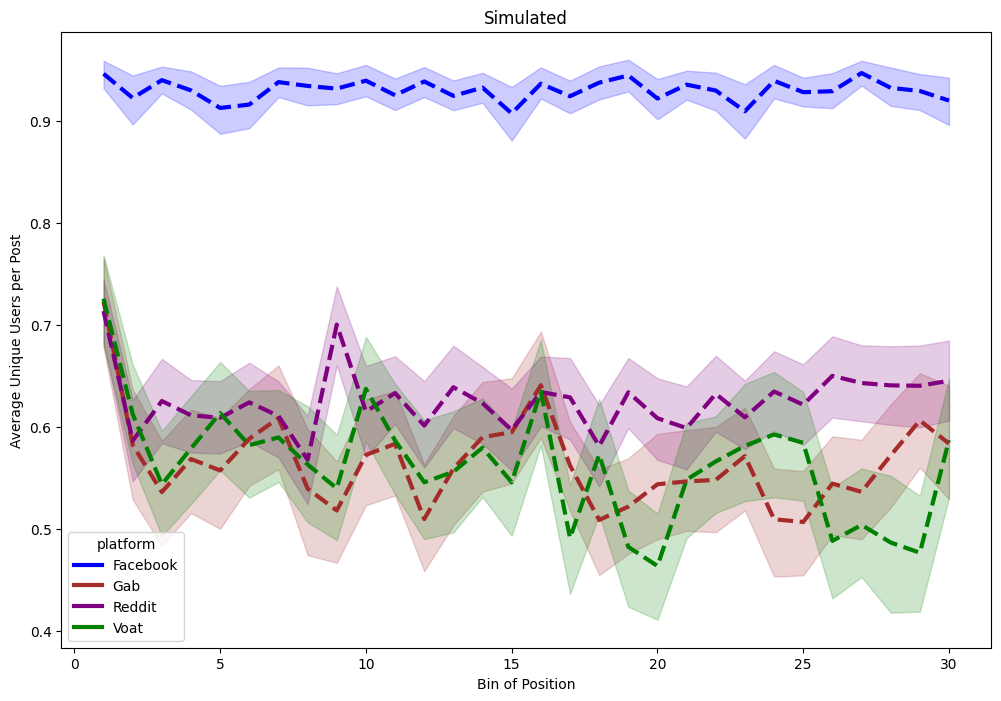

In [79]:

plt.figure(figsize=(12, 8))

# Create the line plot
sns.lineplot(
    data=agg_activity,
    x='bin_of_position',
    y='first_comment',
    hue='platform',  # Different line for each platform
    estimator='mean',  # Aggregation preference
    errorbar=('ci', 80),  # 80% confidence interval
    linewidth=3,
    palette={'Reddit': 'purple', 'Voat': 'green', 'Facebook': 'blue', 'Gab': 'brown'},  # Adding style for dashed line
)

# Manually setting the line style for one of the platforms
lines = plt.gca().get_lines()
for line in lines:
  line.set_linestyle('--')

plt.title('Simulated')
plt.ylabel('Average Unique Users per Post')
plt.xlabel('Bin of Position')
plt.grid(False)
plt.show()

## Number of comments for stymulus

<ipython-input-17-cb8c86728e0f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distanza_tra_commenti'] = df.groupby(['user_id','post_id',])['indice_commento'].diff()
<ipython-input-17-cb8c86728e0f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distanza_tra_commenti_relativa'] =df['indice_commento']/df['number_of_comments']


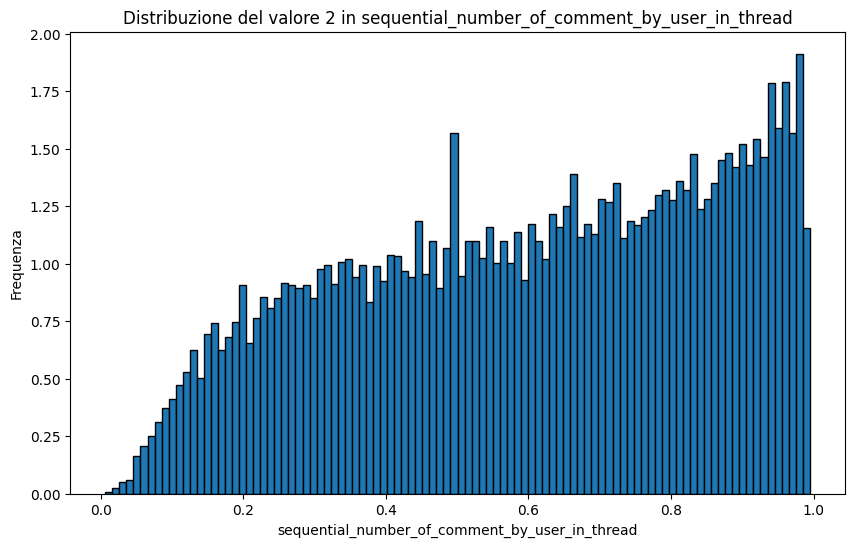

In [ ]:
import pandas as pd
social=vo
social['post_id']=social['root_submission']
social['user_id']=social['user']
# Converti 'created_at' in formato datetime
social['created_at'] = pd.to_datetime(social['created_at'])

# Ordina i dati per 'post_id' e 'created_at'
social = social.sort_values(by=['post_id', 'created_at'])

# Assegna un indice sequenziale a ogni commento all'interno di ciascun gruppo di 'post_id'
social['indice_commento'] = social.groupby('post_id').cumcount()

# Seleziona le colonne di interesse
df = social[['indice_commento', 'user_id', 'post_id', 'sequential_number_of_comment_by_user_in_thread', 'number_of_comments']]

df['distanza_tra_commenti'] = df.groupby(['user_id','post_id',])['indice_commento'].diff()
df['distanza_tra_commenti_relativa'] =df['indice_commento']/df['number_of_comments']
# Filtro per il valore 2

df_filtered = df[df['sequential_number_of_comment_by_user_in_thread'] == 4]

# Traccia la distribuzione
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['distanza_tra_commenti_relativa'], bins=100, edgecolor='black',density=True)
plt.title('Distribuzione del valore 2 in sequential_number_of_comment_by_user_in_thread')
plt.xlabel('sequential_number_of_comment_by_user_in_thread')
plt.ylabel('Frequenza')
plt.show()

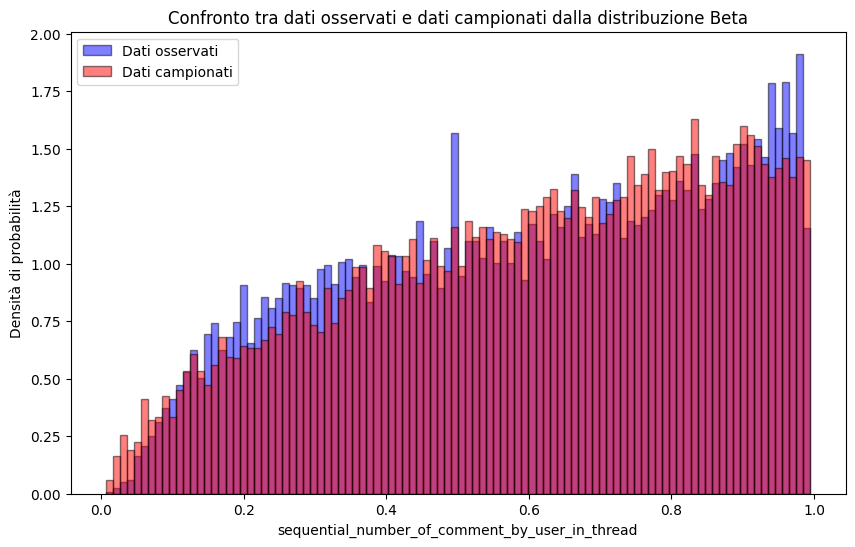

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta

# Esempio di DataFrame filtrato (df_filtered) con i dati di 'distanza_tra_commenti'
# df_filtered = pd.DataFrame({'distanza_tra_commenti': ...})

# Estrazione dei dati filtrati
data_to_fit = df_filtered['distanza_tra_commenti_relativa']

# Verifica di valori finiti
data_to_fit = data_to_fit[np.isfinite(data_to_fit)]

# Fit della distribuzione Beta ai dati
a, b, loc, scale = beta.fit(data_to_fit)

# Campionamento dalla distribuzione Beta con i parametri ottenuti
sampled_data = beta.rvs(a, b, loc, scale, size=len(data_to_fit))

# Creazione dei bins comuni
num_bins = 100
bins = np.histogram_bin_edges(data_to_fit, bins=num_bins)

# Plot dei dati osservati e dei dati campionati
plt.figure(figsize=(10, 6))

# Istogramma dei dati osservati
plt.hist(data_to_fit, bins=bins, density=True, alpha=0.5, color='blue', edgecolor='black', label='Dati osservati')

# Istogramma dei dati campionati
plt.hist(sampled_data, bins=bins, density=True, alpha=0.5, color='red', edgecolor='black', label='Dati campionati')

plt.title('Confronto tra dati osservati e dati campionati dalla distribuzione Beta')
plt.xlabel('sequential_number_of_comment_by_user_in_thread')
plt.ylabel('Densità di probabilità')
plt.legend()
plt.show()
